## Mini Project III

In [434]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import plotly.express as px

import plotly.graph_objects as go

import seaborn as sns

# import Kmeans from sklearn
from sklearn.cluster import KMeans

#Scalar
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

In [306]:
#read the datasets
df_cust = pd.read_csv('mini-project-III/twm_customer.csv',sep=';')

In [307]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [308]:
df_cust

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [340]:
#create a copy of customer dataset for numeric transformations and applying of 
#clustering algorithm
df_cust_num = df_cust.copy()

In [341]:
#convert gender variable to numeric value for applying algorithm later
df_cust_num['gender_num'] = 1
df_cust_num.loc[df_cust_num['gender'] == 'F ', 'gender_num'] = 0

In [342]:
#drop all non-numeric columns including the gender string column
df_cust_num.drop(['cust_id','gender', 'first_name', 'last_name', 'street_nbr', 'street_name',
                      'postal_code', 'city_name', 'state_code', 'name_prefix'], axis=1, inplace = True)
df_cust_num

,income,age,years_with_bank,nbr_children,marital_status,gender_num
0,26150,46,5,1,2,1
1,6605,71,1,0,2,1
2,18548,38,8,0,1,0
3,47668,54,3,0,1,0
4,44554,59,9,2,4,0
...,...,...,...,...,...,...
742,14795,36,6,1,4,0
743,26387,56,6,1,2,1
744,61300,50,0,2,2,1
745,15100,37,7,0,2,0


In [343]:
#define marital status and gender number as category variables to apply algorithm later.
df_cust_num[['marital_status', 'gender_num']] = df_cust_num[['marital_status', 'gender_num']].astype('category') 
df_cust_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   income           747 non-null    int64   
 1   age              747 non-null    int64   
 2   years_with_bank  747 non-null    int64   
 3   nbr_children     747 non-null    int64   
 4   marital_status   747 non-null    category
 5   gender_num       747 non-null    category
dtypes: category(2), int64(4)
memory usage: 25.2 KB


In [349]:
#assign dummy variables for 'marital status' which is a category variable with multiple values
# and then drop original marital status column.
encoder = OneHotEncoder()
df_cust_num_temp = pd.DataFrame(encoder.fit_transform(df_cust_num[['marital_status']]).toarray())
df_cust_num_temp.columns = ['marital_status_1','marital_status_2', 'marital_status_3', 'marital_status_4']
df_cust_num_dummied = pd.concat([df_cust_num, df_cust_num_temp], axis=1)
df_cust_num_dummied.drop(columns=['marital_status'], inplace=True) 
df_cust_num_dummied

,income,age,years_with_bank,nbr_children,gender_num,marital_status_1,marital_status_2,marital_status_3,marital_status_4
0,26150,46,5,1,1,0.0,1.0,0.0,0.0
1,6605,71,1,0,1,0.0,1.0,0.0,0.0
2,18548,38,8,0,0,1.0,0.0,0.0,0.0
3,47668,54,3,0,0,1.0,0.0,0.0,0.0
4,44554,59,9,2,0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
742,14795,36,6,1,0,0.0,0.0,0.0,1.0
743,26387,56,6,1,1,0.0,1.0,0.0,0.0
744,61300,50,0,2,1,0.0,1.0,0.0,0.0
745,15100,37,7,0,0,0.0,1.0,0.0,0.0


In [350]:
#scale all colummns to a common scale to apply the clustering algorithm.
columns_list = df_cust_num_dummied.columns
scaler = MinMaxScaler()
df_cust_num_dummied_scaled = pd.DataFrame(scaler.fit_transform(df_cust_num_dummied))
df_cust_num_dummied_scaled.columns = columns_list
df_cust_num_dummied_scaled

,income,age,years_with_bank,nbr_children,gender_num,marital_status_1,marital_status_2,marital_status_3,marital_status_4
0,0.181399,0.434211,0.555556,0.2,1.0,0.0,1.0,0.0,0.0
1,0.045818,0.763158,0.111111,0.0,1.0,0.0,1.0,0.0,0.0
2,0.128665,0.328947,0.888889,0.0,0.0,1.0,0.0,0.0,0.0
3,0.330667,0.539474,0.333333,0.0,0.0,1.0,0.0,0.0,0.0
4,0.309066,0.605263,1.000000,0.4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,0.0,0.0,0.0,0.0,1.0
743,0.183043,0.565789,0.666667,0.2,1.0,0.0,1.0,0.0,0.0
744,0.425231,0.486842,0.000000,0.4,1.0,0.0,1.0,0.0,0.0
745,0.104747,0.315789,0.777778,0.0,0.0,0.0,1.0,0.0,0.0


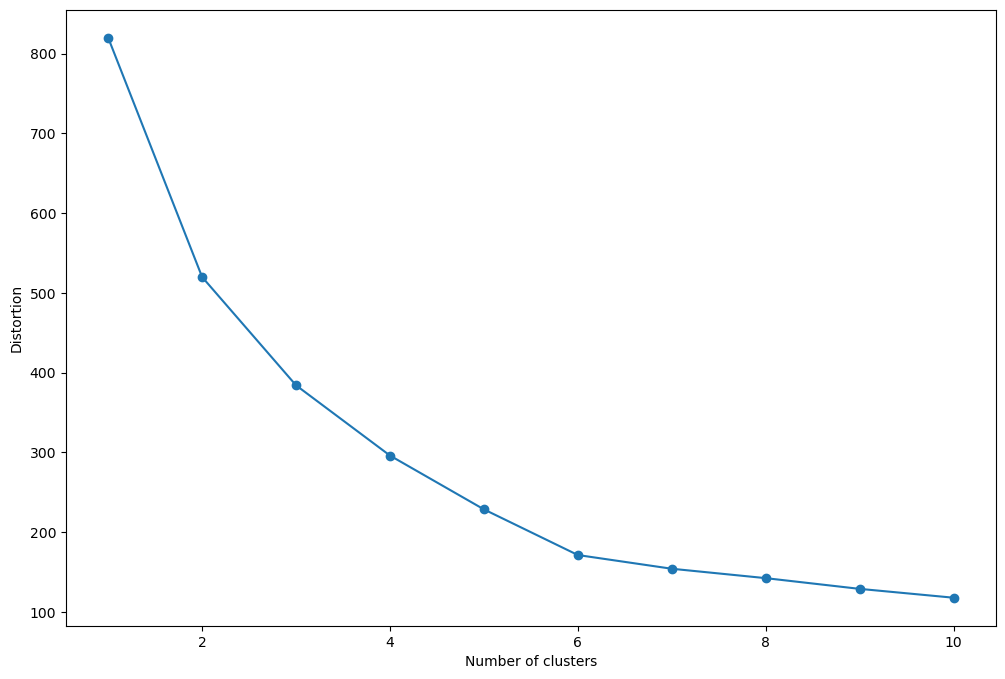

In [351]:
#plot the elbow graph to determine the optimal number of clusters for the dummied and scaled 
#dataset.
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 
    
# elbow rule
plot_distortion(df_cust_num_dummied_scaled,max_clusters=10)

In [352]:
# choosing 5 clusters and applying fit and predict algorithm from kmeans.
df_cust_num_dummied_scaled['cluster'] = KMeans(n_clusters=5, n_init=10, random_state=0).fit_predict(
                                                                                df_cust_num_dummied_scaled)
df_cust_num_dummied_scaled

,income,age,years_with_bank,nbr_children,gender_num,marital_status_1,marital_status_2,marital_status_3,marital_status_4,cluster
0,0.181399,0.434211,0.555556,0.2,1.0,0.0,1.0,0.0,0.0,3
1,0.045818,0.763158,0.111111,0.0,1.0,0.0,1.0,0.0,0.0,3
2,0.128665,0.328947,0.888889,0.0,0.0,1.0,0.0,0.0,0.0,2
3,0.330667,0.539474,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,2
4,0.309066,0.605263,1.000000,0.4,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,0.0,0.0,0.0,0.0,1.0,4
743,0.183043,0.565789,0.666667,0.2,1.0,0.0,1.0,0.0,0.0,3
744,0.425231,0.486842,0.000000,0.4,1.0,0.0,1.0,0.0,0.0,3
745,0.104747,0.315789,0.777778,0.0,0.0,0.0,1.0,0.0,0.0,1


In [353]:
#now unscaling back to original values of columns
df_cust_num_dummied_unscaled = pd.DataFrame(scaler.inverse_transform(
                                            df_cust_num_dummied_scaled.drop(columns=['cluster'])))
df_cust_num_dummied_unscaled.columns = columns_list 
df_cust_num_dummied_unscaled['cluster'] = df_cust_num_dummied_scaled['cluster']
df_cust_num_dummied_unscaled

,income,age,years_with_bank,nbr_children,gender_num,marital_status_1,marital_status_2,marital_status_3,marital_status_4,cluster
0,26150.0,46.0,5.0,1.0,1.0,0.0,1.0,0.0,0.0,3
1,6605.0,71.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3
2,18548.0,38.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,47668.0,54.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,2
4,44554.0,59.0,9.0,2.0,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...
742,14795.0,36.0,6.0,1.0,0.0,0.0,0.0,0.0,1.0,4
743,26387.0,56.0,6.0,1.0,1.0,0.0,1.0,0.0,0.0,3
744,61300.0,50.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,3
745,15100.0,37.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [354]:
#reverting back to original marital status variable.
df_cust_num_temp = pd.DataFrame(encoder.inverse_transform(df_cust_num_dummied_unscaled[['marital_status_1',
                                                'marital_status_2','marital_status_3', 'marital_status_4']]))
df_cust_num_temp.columns = ['marital_status']
df_cust_num_undummied_unscaled = pd.concat([df_cust_num_dummied_unscaled, df_cust_num_temp], axis=1)
df_cust_num_undummied_unscaled.drop(columns=['marital_status_1','marital_status_2',
                                                            'marital_status_3', 'marital_status_4'], 
                                  inplace=True)
df_cust_num_undummied_unscaled

,income,age,years_with_bank,nbr_children,gender_num,cluster,marital_status
0,26150.0,46.0,5.0,1.0,1.0,3,2
1,6605.0,71.0,1.0,0.0,1.0,3,2
2,18548.0,38.0,8.0,0.0,0.0,2,1
3,47668.0,54.0,3.0,0.0,0.0,2,1
4,44554.0,59.0,9.0,2.0,0.0,4,4
...,...,...,...,...,...,...,...
742,14795.0,36.0,6.0,1.0,0.0,4,4
743,26387.0,56.0,6.0,1.0,1.0,3,2
744,61300.0,50.0,0.0,2.0,1.0,3,2
745,15100.0,37.0,7.0,0.0,0.0,1,2


In [359]:
#plotting radar chart (only possible with scaled dataset with numeric variables)
df_cust_num_dummied_scaled_grouped = df_cust_num_dummied_scaled.groupby('cluster').mean().round(2).drop(
                                            columns=['gender_num','marital_status_1','marital_status_2',
                                                    'marital_status_3','marital_status_4'])
df_cust_num_dummied_scaled_grouped

,income,age,years_with_bank,nbr_children
cluster,,,,
0,0.11,0.21,0.42,0.0
1,0.16,0.49,0.44,0.2
2,0.09,0.23,0.43,0.0
3,0.21,0.50,0.47,0.2
4,0.22,0.45,0.41,0.3


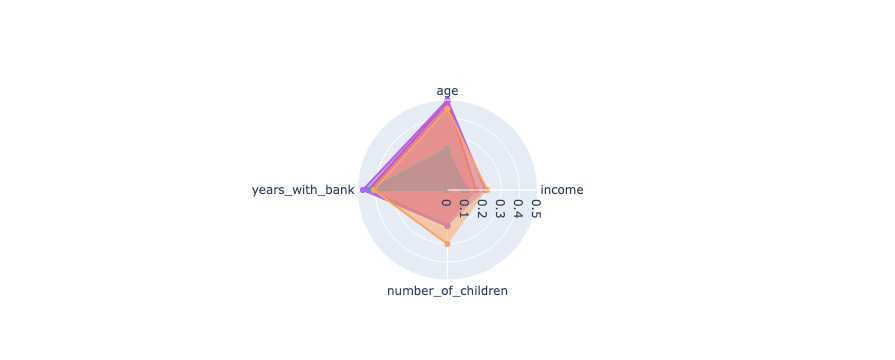

In [399]:
categories = ['income', 'age', 'years_with_bank', 'number_of_children']

fig = go.Figure()

i = 0

for row in df_cust_num_dummied_scaled_grouped.iterrows():
    fig.add_trace(go.Scatterpolar(
      r=list(row[1]),
      theta=categories,
      fill='toself',
      text ='Cluster ' + str(i)
    ))
    i += 1
    
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.5]
    )),
  showlegend=False
)

fig.show()

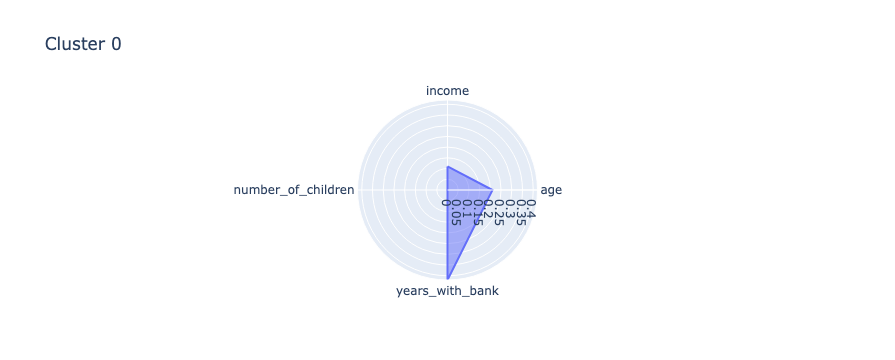

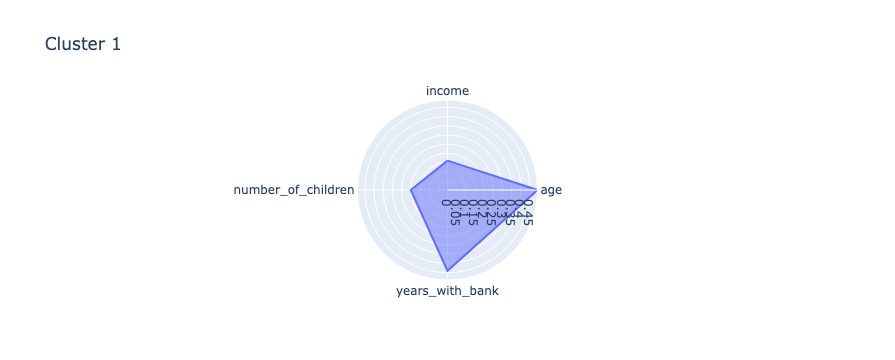

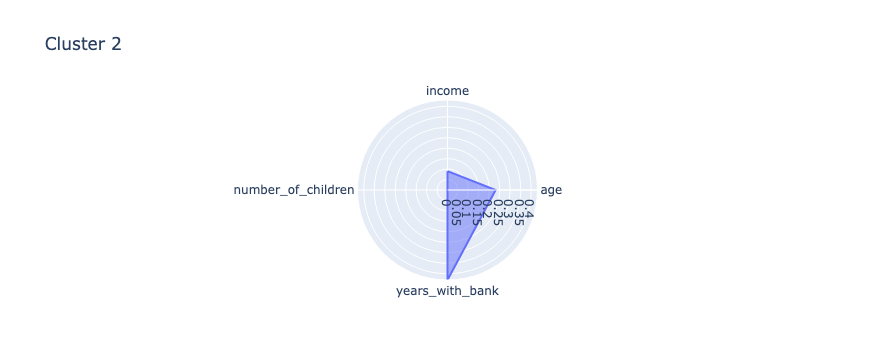

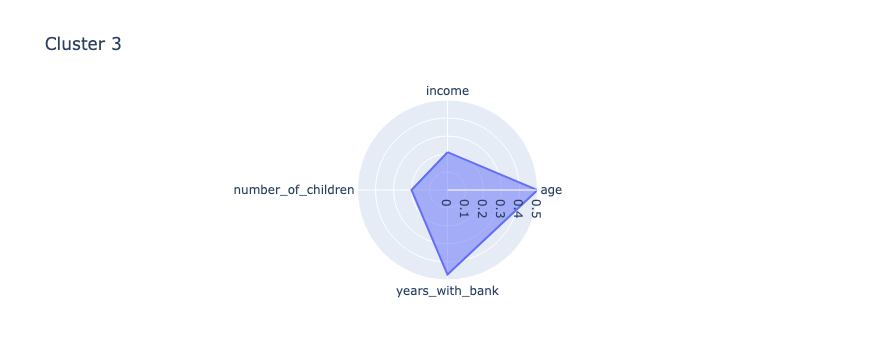

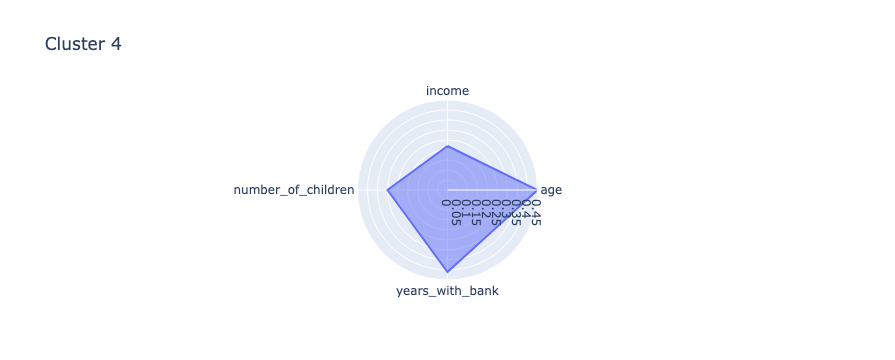

In [397]:
categories = ['income', 'age', 'years_with_bank', 'number_of_children']

i = 0

for row in df_cust_num_dummied_scaled_grouped.iterrows():
    row = list(row[1])
    fig = px.line_polar(r = row , theta = categories, title = 'Cluster ' + str(i), line_close=True)
    fig.update_traces(fill='toself')
    i += 1
    fig.show()

In [400]:
df_cust_num_dummied_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   income            747 non-null    float64
 1   age               747 non-null    float64
 2   years_with_bank   747 non-null    float64
 3   nbr_children      747 non-null    float64
 4   gender_num        747 non-null    float64
 5   marital_status_1  747 non-null    float64
 6   marital_status_2  747 non-null    float64
 7   marital_status_3  747 non-null    float64
 8   marital_status_4  747 non-null    float64
 9   cluster           747 non-null    int32  
dtypes: float64(9), int32(1)
memory usage: 55.6 KB


In [417]:
#extract the independent features and target feature into separate numpy arrays
features = ['income', 'age', 'years_with_bank', 'nbr_children', 'gender_num', 
                    'marital_status_1', 'marital_status_2', 'marital_status_3', 'marital_status_4' ]

# Separating out the features
x = df_cust_num_dummied_scaled.loc[:, features].values

# Separating out the target
y = df_cust_num_dummied_scaled.loc[:,['cluster']].values

print(x.shape)
print(y.shape)

(747, 9)
(747, 1)


In [423]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])
principalComponents.shape

(747, 2)

In [424]:
finalDf = pd.concat([principalDf, df_cust_num_dummied_scaled[['cluster']]], axis = 1)
finalDf

,principal_component_1,principal_component_2,cluster
0,-0.674302,0.521195,3
1,-0.690774,0.511575,3
2,0.798005,-0.378665,2
3,0.759210,-0.375593,2
4,0.009081,-0.465802,4
...,...,...,...
742,0.122154,-0.464117,4
743,-0.704590,0.518379,3
744,-0.711491,0.526164,3
745,-0.557719,-0.471654,1


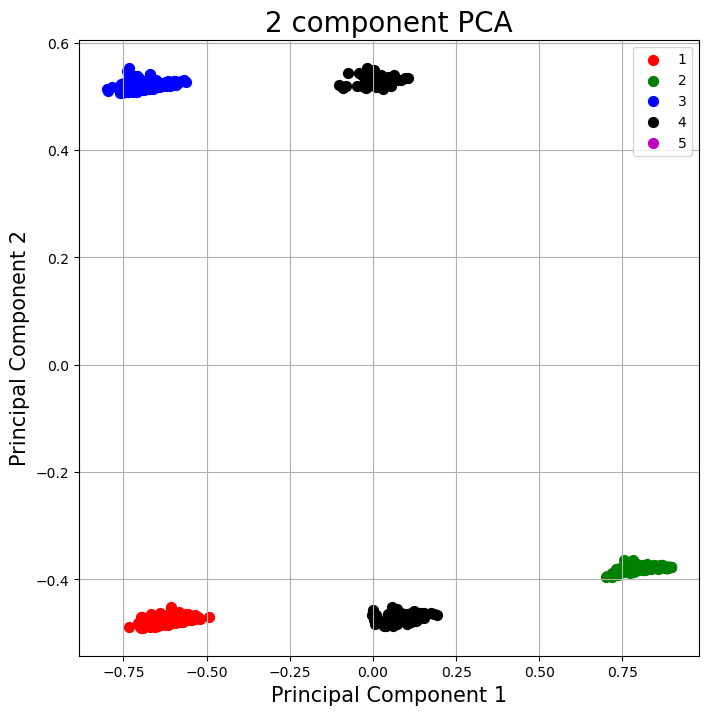

In [425]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3, 4, 5]
colors = ['r', 'g', 'b', 'k', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal_component_1']
               , finalDf.loc[indicesToKeep, 'principal_component_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()